In [7]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

# Load ImageNet30

In [8]:
T_resize_224 = T.Resize(size=(224,224))
T_resize_32 = T.Resize(size=(32,32))
T_resize_16 = T.Resize(size=(16,16))
T_resize_8 = T.Resize(size=(8,8))
T_resize_4 = T.Resize(size=(4,4))
            

In [9]:
data_224 = ImageFolder('../data/imgnet30/one_class_train/', T_resize_224)
data_32 = ImageFolder('../data/imgnet30/one_class_train/', T_resize_32)
data_16 = ImageFolder('../data/imgnet30/one_class_train/', T_resize_16)
data_8 = ImageFolder('../data/imgnet30/one_class_train/', T_resize_8)
data_4 = ImageFolder('../data/imgnet30/one_class_train/', T_resize_4)
    

In [12]:
data_224[0]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

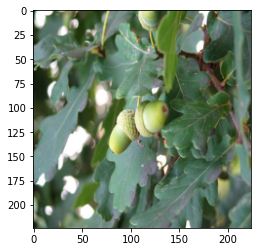

In [13]:
plt.imshow(data_224[0][0])

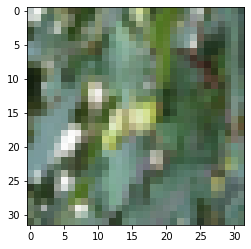

In [14]:
plt.imshow(data_32[0][0])

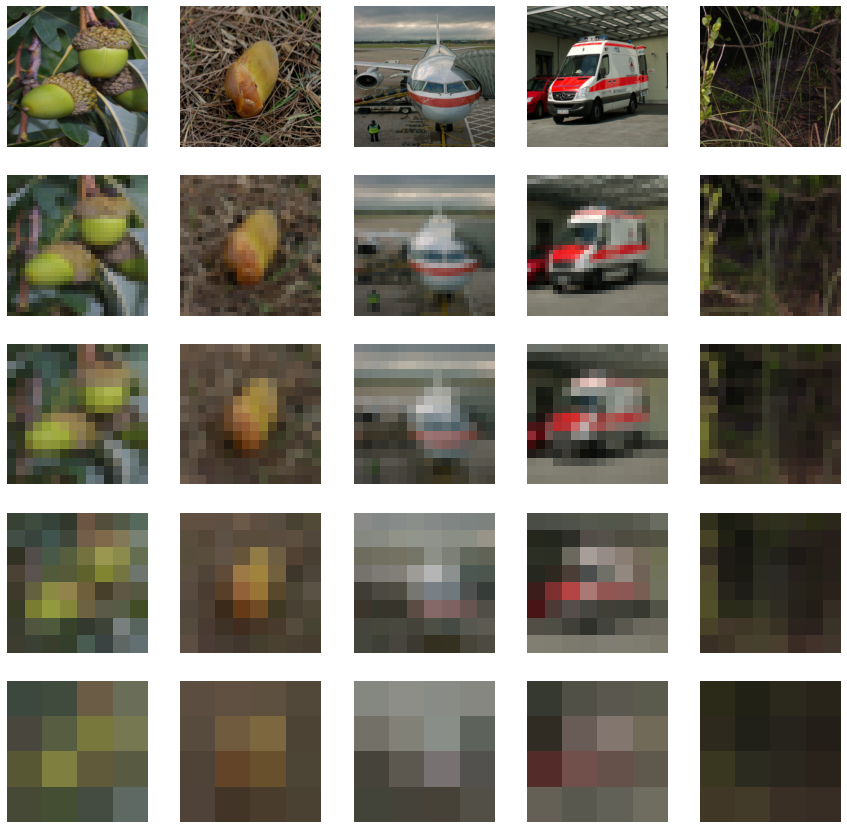

In [28]:
w = 10
h = 10
fig = plt.figure(figsize=(15, 15))
rows = 5
cols = 5
for i in range(rows):
    for j in range(cols):
        if i == 0:
            img = data_224[j*1000+1][0]
        if i == 1:
            img = data_32[j*1000+1][0]
        if i == 2:
            img = data_16[j*1000+1][0]
        if i == 3:
            img = data_8[j*1000+1][0]
        if i == 4:
            img = data_4[j*1000+1][0]
        idx = (rows*i)+j+1
        fig.add_subplot(rows, cols, idx)
        plt.imshow(img)
        plt.axis('off')
plt.show()

# ImageNet30 with 32x32

In [113]:
folder_path = 'result_resolution/'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(files[0])

group_results2 = {}
groups = ['Uniform', 'kCenterGreedy', 'Uncertainty', 'Forgetting', 'GraNd', 'GradMatch', 'Submodular']
fr_dict = {'0.01':0, '0.05':1, '0.1':2, '0.2':3, '0.4':4}
n_fr = len(fr_dict)
n_exp = 3
n_metric = 2
for g in groups:
    group_results2[g] = np.zeros((n_fr, n_exp, n_metric))

for i, f in enumerate(files):
    group = f.split('_')[2]
    fr = f.split('_')[6].split('fr')[1]
    exp = int(f.split('_')[3].split('exp')[1])
    
    print(group, fr, exp)

    checkpoint = torch.load(folder_path+f)

    group_results2[group][fr_dict[fr], exp, 0] = checkpoint['best_acc1']
    group_results2[group][fr_dict[fr], exp, 1] = checkpoint['elapsed_time']

ImageNet30_ResNet18_kCenterGreedy_exp2_epoch200_2022-07-12 07:45:06.352055_fr0.01_19.233333.ckpt
kCenterGreedy 0.01 2
GradMatch 0.4 0
Uncertainty 0.05 2
Submodular 0.01 0
kCenterGreedy 0.4 1
GraNd 0.05 2
GradMatch 0.2 1
GraNd 0.2 0
Uncertainty 0.4 2
Submodular 0.2 2
Submodular 0.4 0
Forgetting 0.01 2
Submodular 0.1 2
Forgetting 0.1 0
GraNd 0.05 1
Forgetting 0.05 0
Submodular 0.01 2
GraNd 0.01 0
GraNd 0.4 0
GraNd 0.05 0
Submodular 0.2 1
kCenterGreedy 0.2 2
Uncertainty 0.2 1
Forgetting 0.05 1
GradMatch 0.4 2
Forgetting 0.2 0
Uncertainty 0.01 0
kCenterGreedy 0.01 0
kCenterGreedy 0.1 2
Forgetting 0.05 2
Forgetting 0.4 2
Forgetting 0.4 0
GradMatch 0.05 2
Uncertainty 0.2 2
Submodular 0.1 0
GradMatch 0.1 0
GraNd 0.01 1
GradMatch 0.05 1
Uncertainty 0.1 0
Uncertainty 0.4 0
Forgetting 0.01 1
kCenterGreedy 0.1 1
kCenterGreedy 0.05 1
GraNd 0.2 2
kCenterGreedy 0.2 0
GradMatch 0.01 2
kCenterGreedy 0.4 0
Submodular 0.05 2
Uncertainty 0.4 1
GradMatch 0.1 2
Forgetting 0.2 1
GraNd 0.2 1
Submodular 0.4 1

In [114]:
result2 = {}
for g in groups:
    for fr in fr_dict.keys():
        done = (group_results2[g][fr_dict[fr]][:,0].sum() != 0)
        if done:
            name = g+', '+fr
            result2[name] = group_results2[g][fr_dict[fr]][0]#.mean(axis=0)

for r in result2:
    print("Method: {}, Acc: {:.2f}, Time: {:.2f}".format(r, result2[r][0], result2[r][1]))
#print(result)

Method: kCenterGreedy, 0.01, Acc: 20.77, Time: 312.81
Method: kCenterGreedy, 0.05, Acc: 40.63, Time: 320.01
Method: kCenterGreedy, 0.1, Acc: 68.00, Time: 318.71
Method: kCenterGreedy, 0.2, Acc: 80.97, Time: 318.59
Method: kCenterGreedy, 0.4, Acc: 91.80, Time: 321.92
Method: Uncertainty, 0.01, Acc: 19.67, Time: 178.61
Method: Uncertainty, 0.05, Acc: 45.50, Time: 192.24
Method: Uncertainty, 0.1, Acc: 65.73, Time: 174.89
Method: Uncertainty, 0.2, Acc: 80.03, Time: 185.02
Method: Uncertainty, 0.4, Acc: 91.30, Time: 177.00
Method: Forgetting, 0.01, Acc: 26.17, Time: 117.29
Method: Forgetting, 0.05, Acc: 54.80, Time: 100.09
Method: Forgetting, 0.1, Acc: 69.23, Time: 90.43
Method: Forgetting, 0.2, Acc: 82.37, Time: 89.72
Method: Forgetting, 0.4, Acc: 90.17, Time: 88.00
Method: GraNd, 0.01, Acc: 23.53, Time: 1014.01
Method: GraNd, 0.05, Acc: 54.03, Time: 1072.16
Method: GraNd, 0.1, Acc: 73.03, Time: 1017.03
Method: GraNd, 0.2, Acc: 82.53, Time: 978.48
Method: GraNd, 0.4, Acc: 90.77, Time: 1022

In [3]:
folder_path = 'result/test/'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(files[0])

group_results2 = {}
groups = ['Uniform', 'kCenterGreedy', 'Uncertainty', 'Forgetting', 'GraNd', 'GradMatch', 'Submodular']
fr_dict = {'0.01':0, '0.05':1, '0.1':2, '0.2':3, '0.4':4}
n_fr = len(fr_dict)
n_exp = 3
n_metric = 2
for g in groups:
    group_results2[g] = np.zeros((n_fr, n_exp, n_metric))

for i, f in enumerate(files):
    group = f.split('_')[2]
    fr = f.split('_')[6].split('fr')[1]
    exp = int(f.split('_')[3].split('exp')[1])
    
    print(group, fr, exp)

    checkpoint = torch.load(folder_path+f)

    print(checkpoint)
    
    group_results2[group][fr_dict[fr], exp, 0] = checkpoint['best_acc1']
    group_results2[group][fr_dict[fr], exp, 1] = checkpoint['elapsed_time']

ImageNet30_ResNet18_Uncertainty_exp0_se10_2022-07-18 06:51:36.819340_fr0.1_34.033333.ckpt
Uncertainty 0.1 0
{'exp': 0, 'epoch': 12, 'warmup_acc': 59.8, 'best_acc1': 34.03333329772949, 'rec': namespace(ckpts=[0, 1, 2, 3, 5, 6, 7, 9, 10, 11], lr=[0.09829799502313899, 0.09330796891903276, 0.0853699837202681, 0.07502500000000004, 0.06297801130287091, 0.050050000000000004, 0.03712198869712909, 0.02507500000000001, 0.014730016279731953, 0.006792031080967289, 0.001802004976861044, 0.0001], test_acc=[3.2666666666666666, 6.166666646321614, 10.099999992370606, 14.999999923706055, 12.866666674296061, 18.066666610717775, 23.433333267211914, 26.466666666666665, 24.03333331553141, 32.16666659037272, 33.46666667683919, 34.03333329772949], test_loss=[54.618237111409506, 4.1188772074381514, 3.3571409066518147, 3.0042888971964516, 3.121373849868774, 2.893582249323527, 2.6994114061991374, 2.6171546624501545, 2.6734214096069335, 2.4012757403055827, 2.3618127002716065, 2.329772205988566], test_step=[0, 1, 